In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



In [20]:
# Load the dataset

data = pd.read_csv('ifood_df.csv')

In [21]:
# Display basic information about the dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [22]:
# Check for missing values
print(data.isnull().sum())

# Drop duplicates, if any
data.drop_duplicates(inplace=True)

# Handle missing values (e.g., filling with median or dropping)
data.fillna(data.median(), inplace=True)


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

# Descriptive Statistics


In [23]:
# Calculate total spending (assuming MntWines, MntFruits, etc. are spending columns)
data['MntTotal'] = (data['MntWines'] + data['MntFruits'] + 
                    data['MntMeatProducts'] + data['MntFishProducts'] + 
                    data['MntSweetProducts'] + data['MntGoldProds'])

# Calculate frequency of purchases (sum of different types of purchases)
data['Purchase_Frequency'] = (data['NumDealsPurchases'] + data['NumWebPurchases'] + 
                               data['NumCatalogPurchases'] + data['NumStorePurchases'])

# Calculate total purchase amount
data['Total_Purchase'] = data['MntTotal'] * data['Purchase_Frequency']


In [24]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'Purchase_Frequency', 'Total_Purchase'],
      dtype='object')

In [25]:
# Calculate average purchase value
avg_purchase = data['Total_Purchase'].mean()
print(f"Average Purchase Value: {avg_purchase}")



Average Purchase Value: 12503.304799604157


In [26]:
# Summary statistics of key metrics
metrics = data[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntTotal', 'Purchase_Frequency', 'Total_Purchase']]
print("Summary Statistics:\n", metrics.describe())


Summary Statistics:
               Income      Kidhome     Teenhome      Recency     MntTotal  \
count    2021.000000  2021.000000  2021.000000  2021.000000  2021.000000   
mean    51687.258783     0.443345     0.509649    48.880752   607.711034   
std     20713.046401     0.536196     0.546393    28.950917   602.396167   
min      1730.000000     0.000000     0.000000     0.000000     5.000000   
25%     35416.000000     0.000000     0.000000    24.000000    69.000000   
50%     51412.000000     0.000000     0.000000    49.000000   397.000000   
75%     68274.000000     1.000000     1.000000    74.000000  1048.000000   
max    113734.000000     2.000000     2.000000    99.000000  2525.000000   

       Purchase_Frequency  Total_Purchase  
count         2021.000000     2021.000000  
mean            14.897575    12503.304800  
std              7.598261    14030.919986  
min              0.000000        0.000000  
25%              8.000000      546.000000  
50%             15.000000     

# Data Preprocessing

In [27]:
# Select relevant features for clustering
features = data[['MntTotal', 'Purchase_Frequency', 'Recency', 'Income']]


In [28]:
# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [29]:
# Step 5: Determine Optimal Number of Clusters (Elbow Method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)


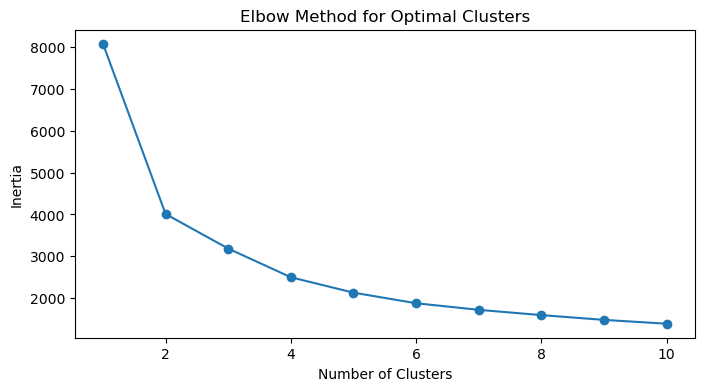

In [30]:
# Plot the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# K-means Clustering

In [31]:
# Apply K-means with the optimal number of clusters (e.g., k=4)
optimal_k = 4  # Adjust based on Elbow method results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)


In [32]:
# Apply K-means with the optimal number of clusters (e.g., k=4)
optimal_k = 4  # Adjust based on Elbow method results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)


# Visualization

In [34]:
# Dimensionality reduction for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
data['PCA1'] = features_pca[:, 0]
data['PCA2'] = features_pca[:, 1]

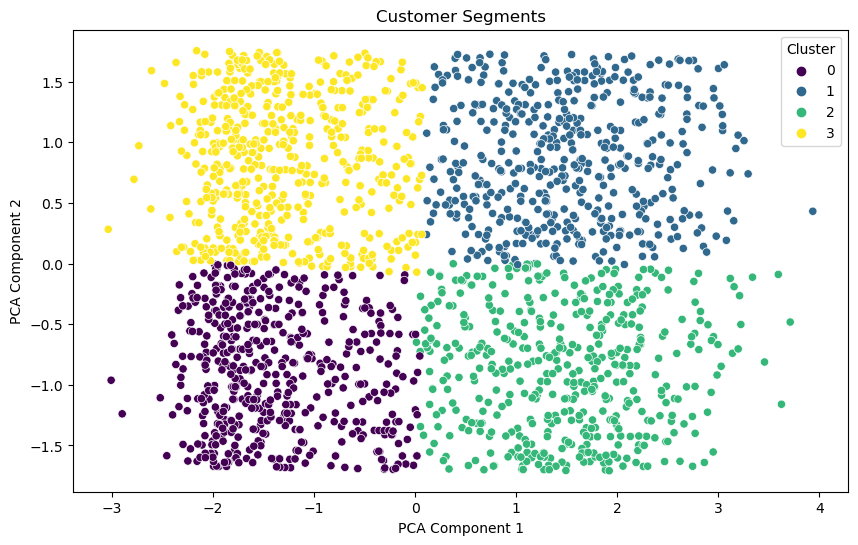

In [35]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [36]:
# Step 8: Insights and Recommendations
# Analyze each cluster
cluster_summary = data.groupby('Cluster').mean()
print("Cluster Summary:\n", cluster_summary)


Cluster Summary:
                Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        35411.056641  0.710938  0.478516  22.744141   60.224609   6.365234   
1        69241.451143  0.112266  0.534304  73.904366  590.767152  47.343035   
2        69168.199580  0.140756  0.504202  23.888655  569.661765  49.598739   
3        36413.565217  0.744565  0.521739  72.869565   60.268116   6.599638   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0              27.093750         9.103516          5.601562     20.482422   
1             317.885655        68.827443         52.122661     71.415800   
2             317.500000        69.336134         48.894958     69.409664   
3              32.068841         9.467391          7.059783     19.726449   

         ...  education_Graduation  educatio

In [37]:
# Example: Identify high-value customer segment
high_value_customers = data[data['Cluster'] == cluster_summary['Total_Purchase'].idxmax()]
print("High-Value Customer Segment:\n", high_value_customers[['Total_Purchase', 'Income', 'Recency']])

High-Value Customer Segment:
       Total_Purchase   Income  Recency
0              40425  58138.0       58
4               8018  58293.0       94
11             17632  63033.0       82
17             46332  76995.0       91
21             16524  58607.0       63
...              ...      ...      ...
2170           19527  73807.0       88
2187            8460  58025.0       81
2193           16978  63777.0       87
2197           28323  44802.0       71
2202           23579  56981.0       91

[481 rows x 3 columns]
